In [11]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [8]:
class LDA:

    def __init__(self, n):
        self.n = n
        self.ld = None

    def fit(self, X, y):
        features = X.shape[1]
        labels = np.unique(y)

        mean = np.mean(X, axis=0)

        Scatter_Within = np.zeros((features , features))
        Scatter_Between = np.zeros((features , features))

        for cls in labels:
            X_c = X[y==cls]
            mean_c = np.mean(X_c, axis=0)
            Scatter_Within += (X_c - mean_c).T.dot(X_c - mean_c)

            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean).reshape(features, 1)
            Scatter_Between += n_c * (mean_diff).dot(mean_diff.T)

        final_matrix = np.linalg.inv(Scatter_Within).dot(Scatter_Between)
        eigenvalues, eigenvectors = np.linalg.eig(final_matrix)
        eigenvectors = eigenvectors.T

        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.ld = eigenvectors[:self.n]


    def transform(self, X):
        return np.dot(X, self.ld.T)

In [4]:
data = load_iris()
X = data.data
y = data.target

In [9]:
lda = LDA(2)
lda.fit(X, y)
linear_discriminants = lda.transform(X)

/tmp/ipykernel_95158/3349873242.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x1, x2, c=y, edgecolors='none', alpha=0.8, cmap=plt.cm.get_cmap('viridis', 3))


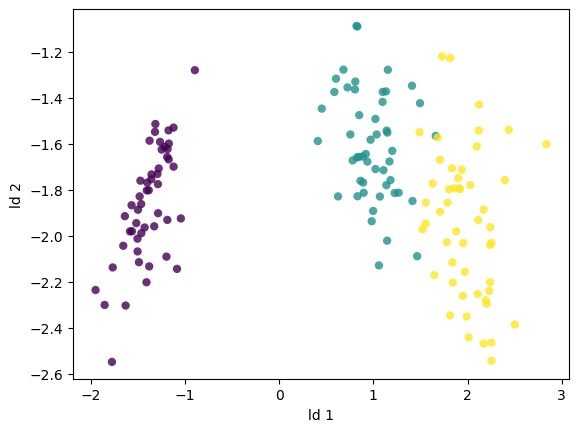

In [12]:
x1 = linear_discriminants[:, 0]
x2 = linear_discriminants[:, 1]

plt.scatter(x1, x2, c=y, edgecolors='none', alpha=0.8, cmap=plt.cm.get_cmap('viridis', 3))
plt.xlabel('ld 1')
plt.ylabel('ld 2')
plt.show()

In [13]:
from pca import PCA

In [15]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

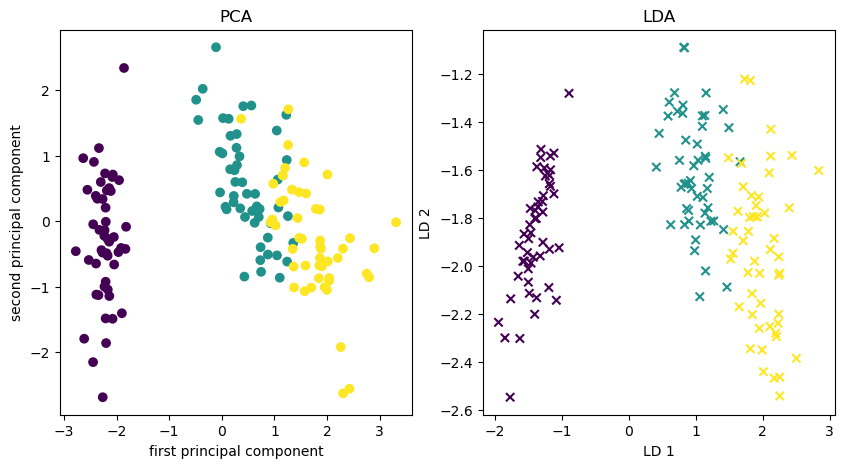

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

scatter_pca = ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
ax[0].set_xlabel('first principal component')
ax[0].set_ylabel('second principal component')
ax[0].set_title('PCA')

x1 = linear_discriminants[:, 0]
x2 = linear_discriminants[:, 1]

scatter_lda = ax[1].scatter(x1, x2, c=y, cmap='viridis', marker='x')
ax[1].set_xlabel('LD 1')
ax[1].set_ylabel('LD 2')
ax[1].set_title('LDA')

plt.show()
